# scikit-learn简介

➢ 开源机器学习库：https://scikit-learn.org/stable/index.html<br>
➢ 涵盖分类、回归、聚类、降维、模型选择、数据预处理六大模块

降低机器学习实践门槛<br>
➢ 涵盖机器学习全流程操作<br>
➢ 将复杂的数学计算集成为简单的函数<br>
➢ 提供了众多公开数据集和学习案例


# 使用sklearn转换器处理数据

## 加载datasets模块中的数据集

### sklearn.datasets()

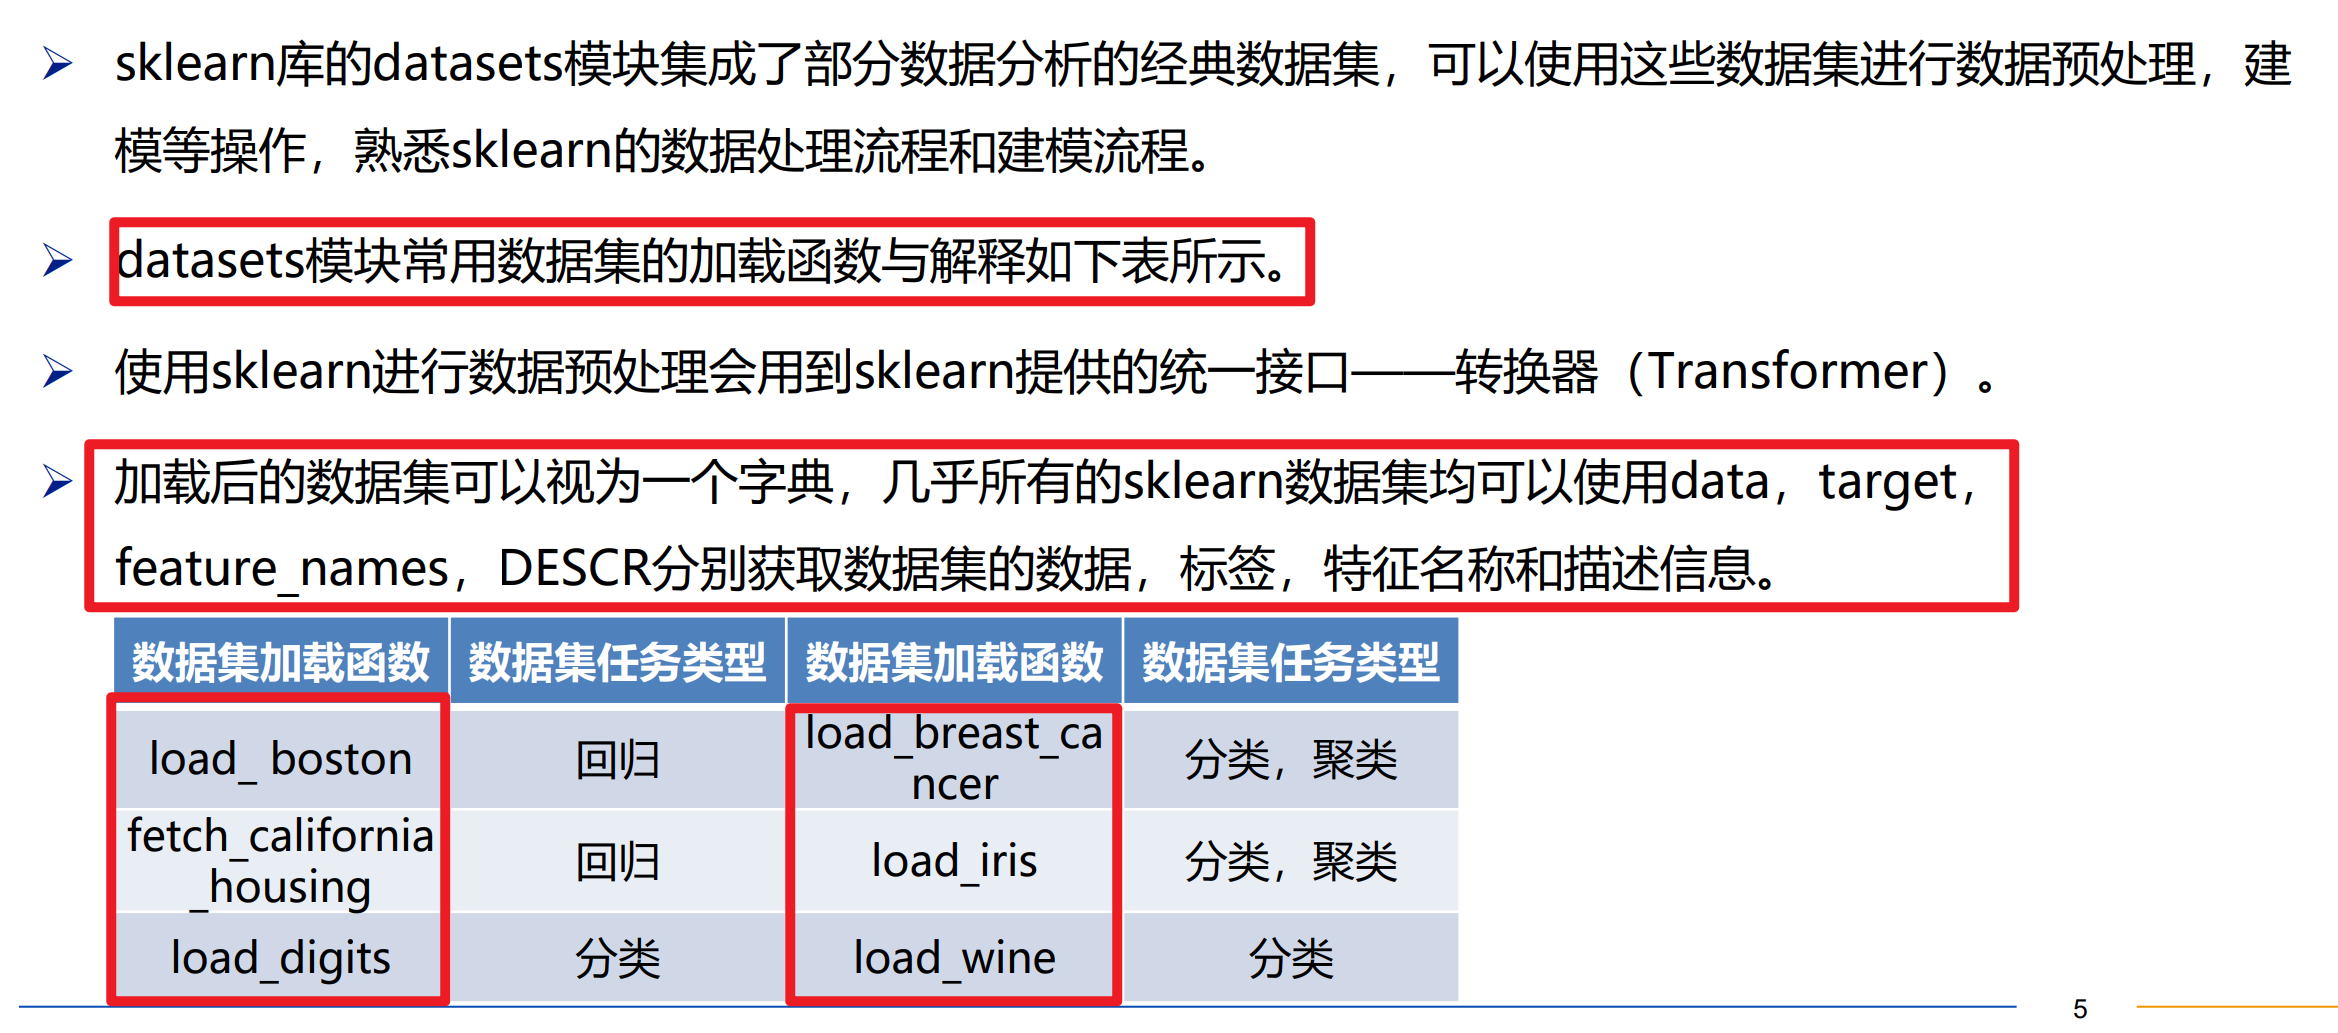

In [6]:
# 导入数据
from sklearn.datasets import load_breast_cancer
# 数据以字典的形式呈现
data=load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
# 查看键
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
data.filename

'breast_cancer.csv'

In [17]:
# 访问数据--字典方式
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## 将数据划分为训练集和测试集

### sklearn.model_selection.train_test_split()

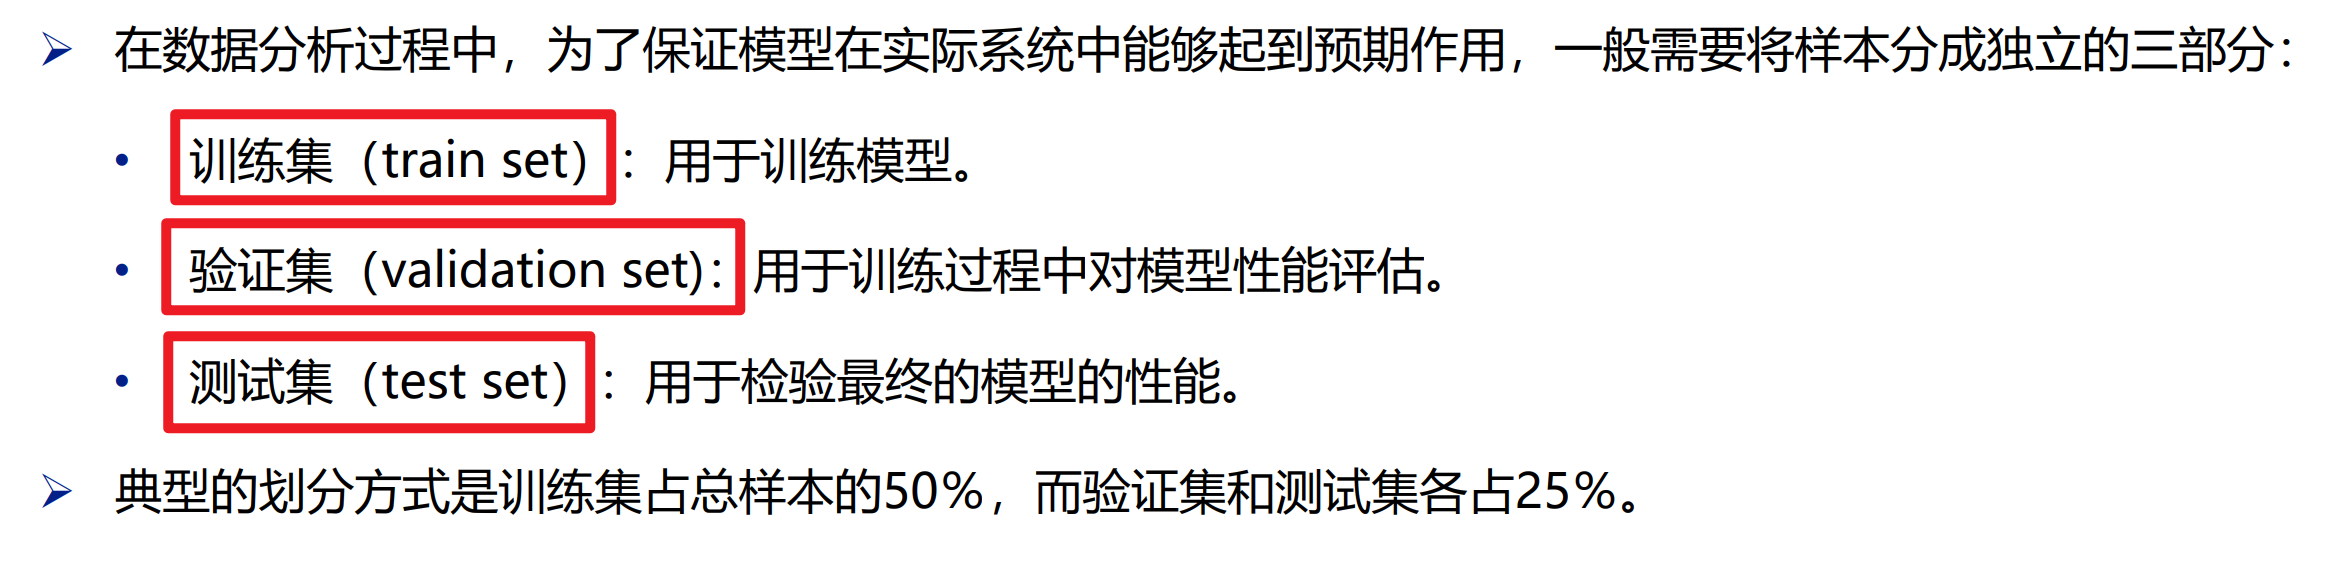

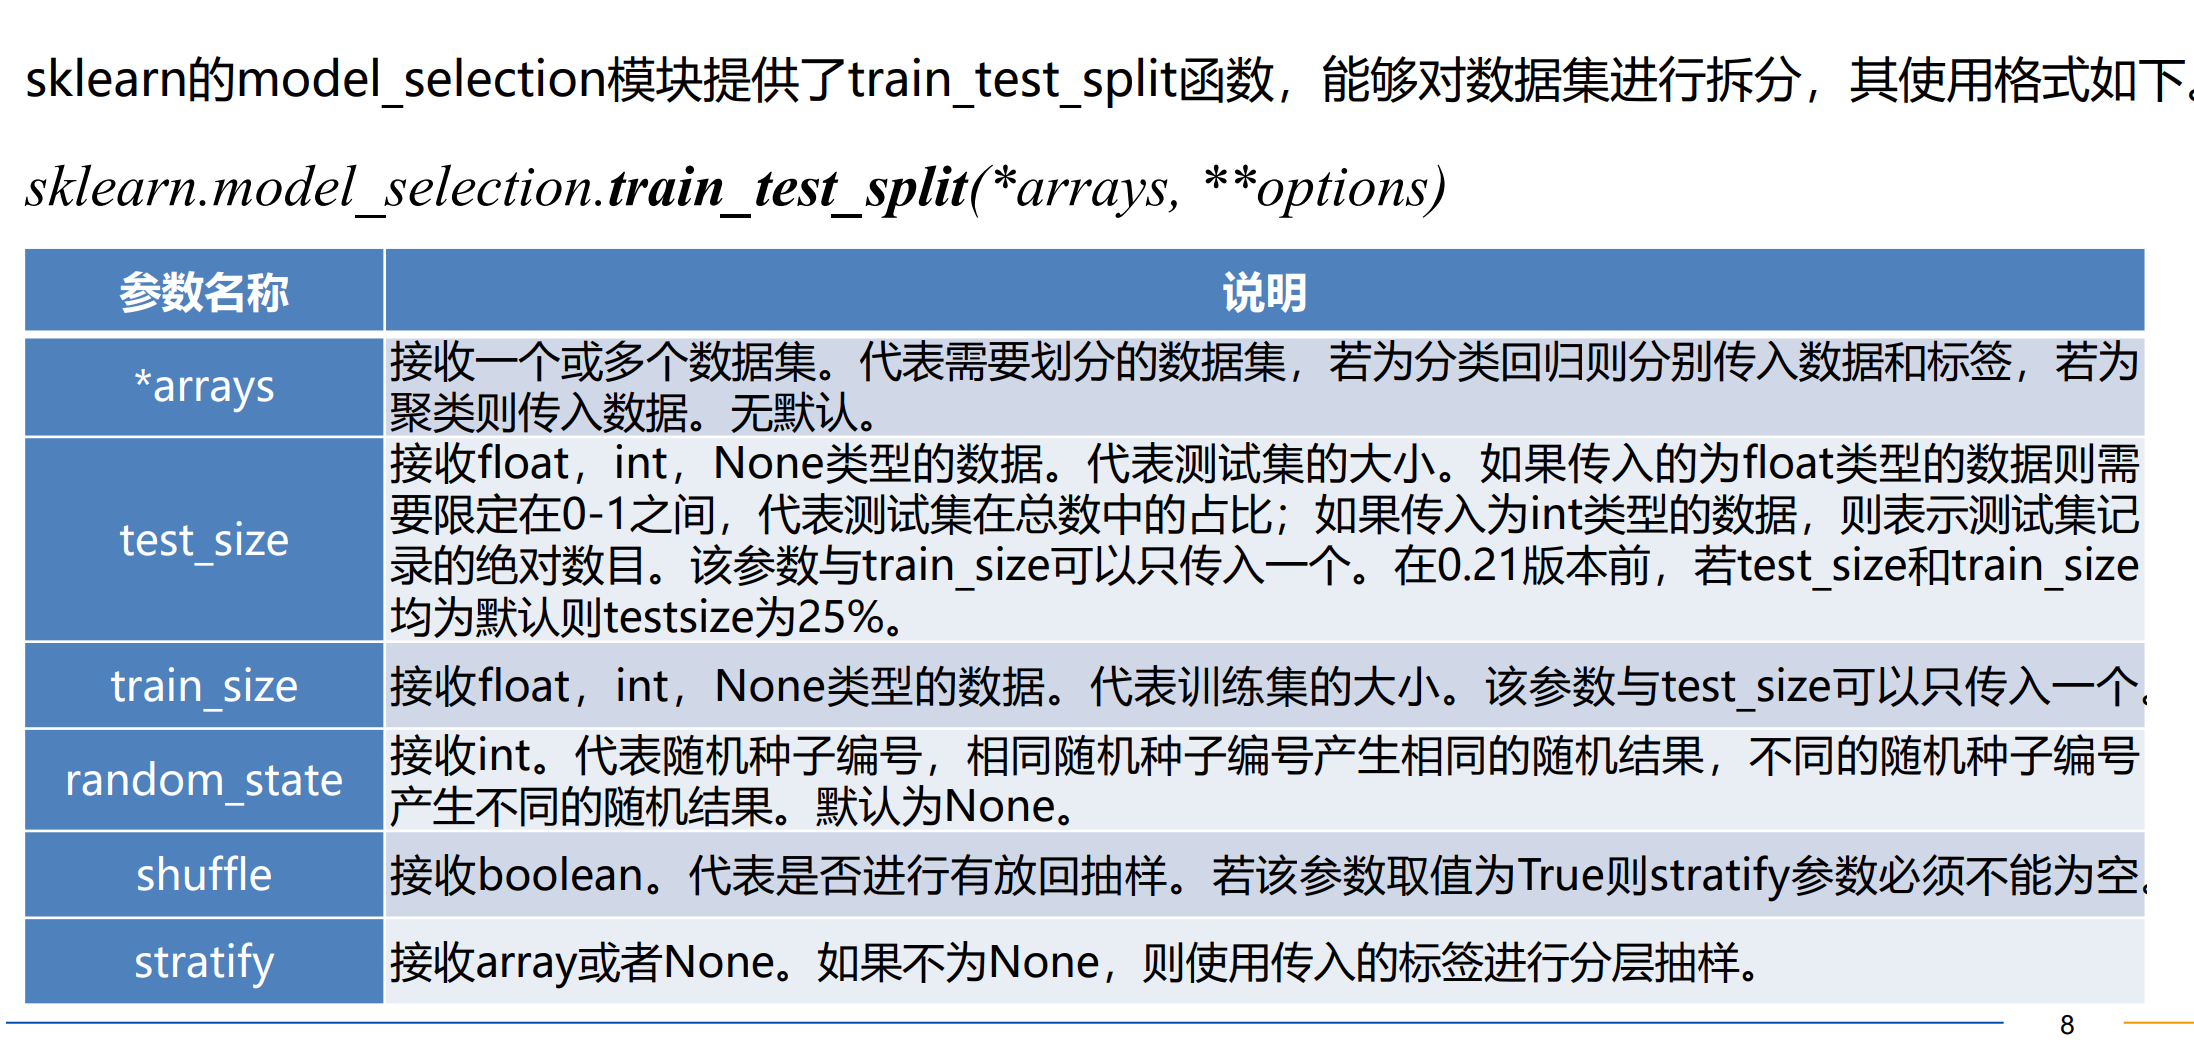

➢ train_test_split函数根据传入的数据，分别将传入的数据划分为训练集和测试集。<br>
➢ 如果传入的是1组数据，那么生成的就是这一组数据随机划分后训练集和测试集，总共2组。如果传入的是
2组数据，则生成的训练集和测试集分别2组，总共4组。<br>
➢ train_test_split是最常用的数据划分方法，在model_selection模块中还提供了其他数据集划分的函数，
如PredefinedSplit，ShuffleSplit等。


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

In [26]:
data=load_iris()
#  data['data']  训练数据
#  data['target'],  训练标签
# train_size=0.2   分割比例，数据分割为训练集和测试集
x_train,x_test,y_train,y_train=train_test_split(
                        data['data'],data['target'],
                        test_size=0.2)
# 统计数据频率
pd.value_counts(y_train)

1    13
0    10
2     7
dtype: int64

In [27]:
# stratify=data['target']  按照数据标签合理分割数据
x_train,x_test,y_train,y_train=train_test_split(
                        data['data'],data['target'],
                        test_size=0.2,stratify=data['target'])
# 统计数据频率
pd.value_counts(y_train)

2    10
0    10
1    10
dtype: int64

## sklearn转换器

➢ 在数据分析过程中，各类特征处理相关的操作都需要对训练集和测试集分开操作，需要将训练集的操作规
则，权重系数等应用到测试集中。<br>
➢ 如果使用pandas，则应用至测试集的过程相对烦琐，使用sklearn转换器可以解决这一困扰。

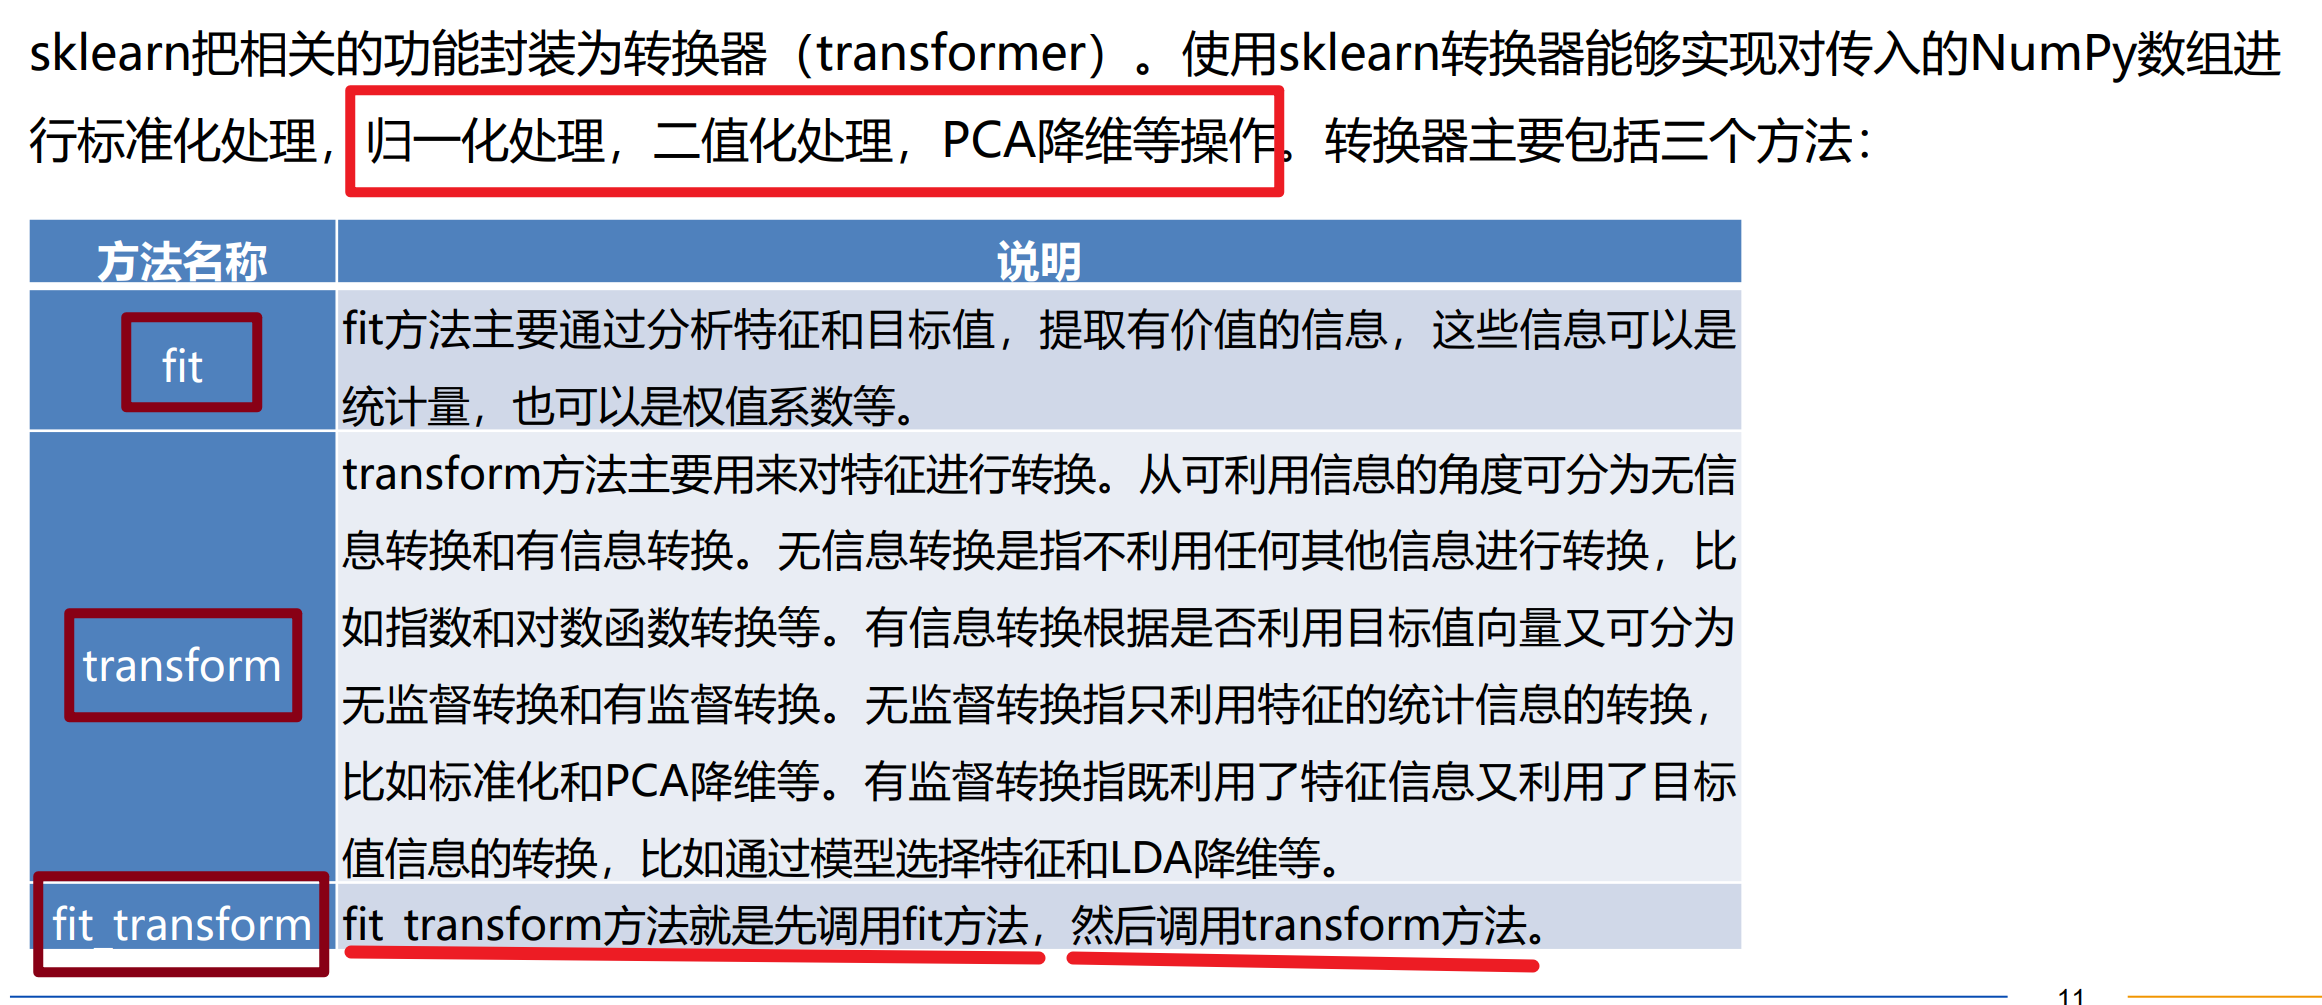

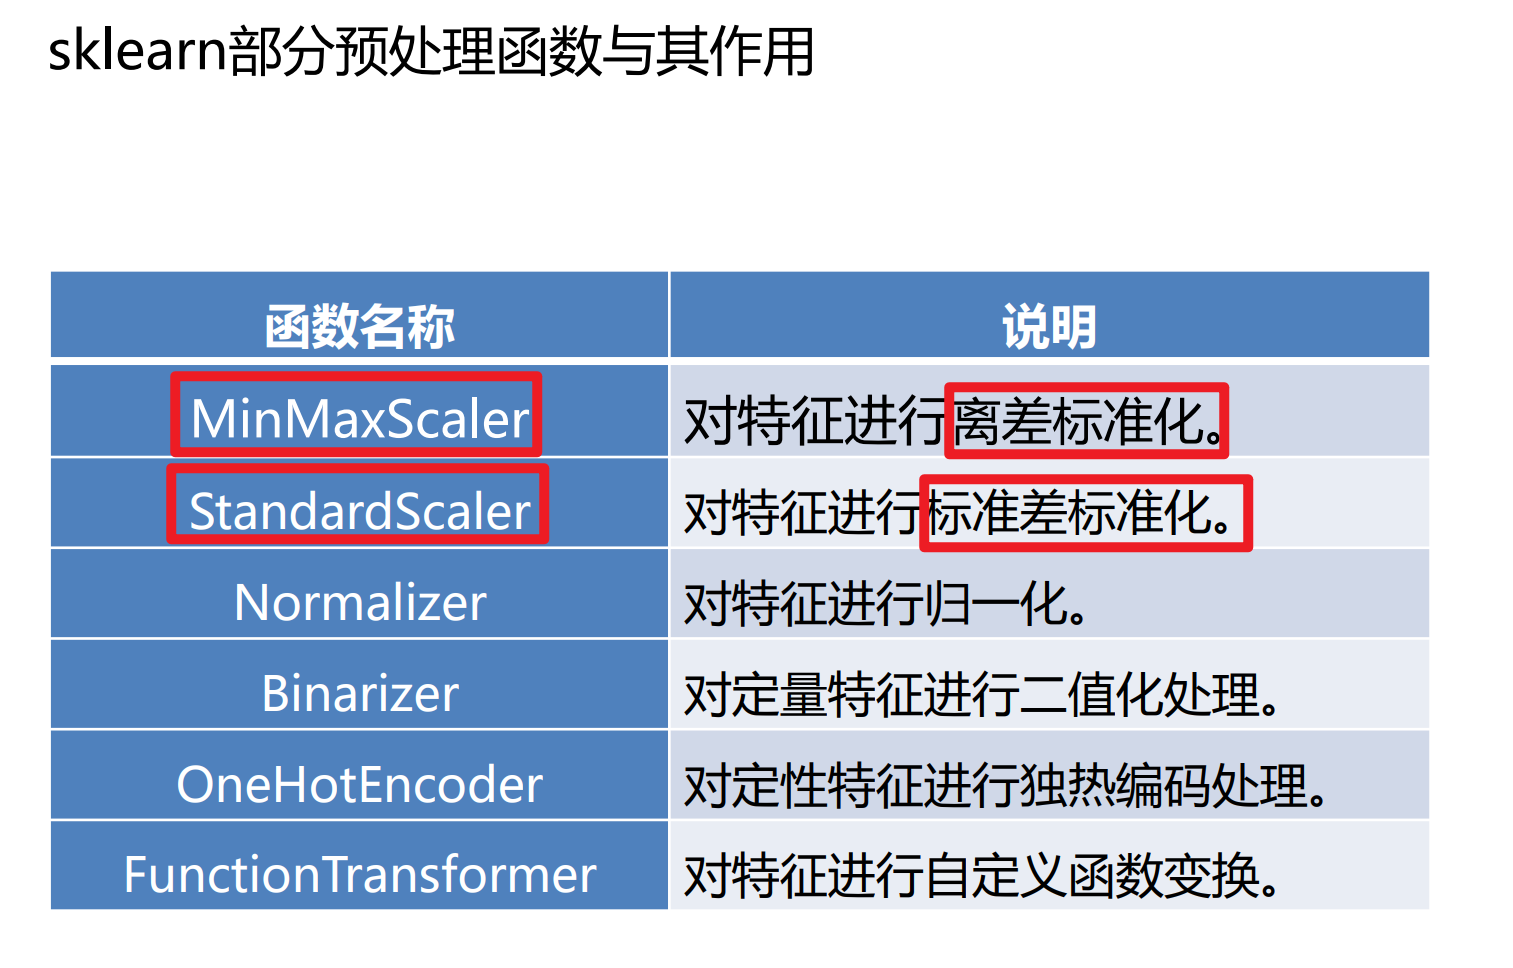

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(
                data['data'],data['target'],
                test_size=0.2,stratify=data['target'])

> 构建转换器、执行转换器分步完成

In [31]:
# 构建转换器
tf=MinMaxScaler().fit(xtrain)

In [34]:
# 执行转换器
tf.transform(xtrain)

array([[0.36111111, 0.29166667, 0.55357143, 0.5       ],
       [0.25      , 0.875     , 0.07142857, 0.        ],
       [0.36111111, 0.20833333, 0.5       , 0.41666667],
       [0.19444444, 0.5       , 0.01785714, 0.04166667],
       [0.47222222, 0.375     , 0.60714286, 0.58333333],
       [0.91666667, 0.41666667, 0.98214286, 0.83333333],
       [0.80555556, 0.41666667, 0.83928571, 0.625     ],
       [0.55555556, 0.375     , 0.80357143, 0.70833333],
       [0.41666667, 0.29166667, 0.5       , 0.45833333],
       [0.25      , 0.58333333, 0.05357143, 0.04166667],
       [0.55555556, 0.20833333, 0.69642857, 0.75      ],
       [0.08333333, 0.45833333, 0.07142857, 0.04166667],
       [0.44444444, 0.41666667, 0.71428571, 0.70833333],
       [0.05555556, 0.125     , 0.03571429, 0.08333333],
       [0.61111111, 0.41666667, 0.78571429, 0.70833333],
       [0.72222222, 0.45833333, 0.71428571, 0.91666667],
       [0.72222222, 0.45833333, 0.76785714, 0.83333333],
       [0.19444444, 0.41666667,

> 构建、执行转换器一步完成

In [35]:
MinMaxScaler().fit_transform(xtrain)

array([[0.36111111, 0.29166667, 0.55357143, 0.5       ],
       [0.25      , 0.875     , 0.07142857, 0.        ],
       [0.36111111, 0.20833333, 0.5       , 0.41666667],
       [0.19444444, 0.5       , 0.01785714, 0.04166667],
       [0.47222222, 0.375     , 0.60714286, 0.58333333],
       [0.91666667, 0.41666667, 0.98214286, 0.83333333],
       [0.80555556, 0.41666667, 0.83928571, 0.625     ],
       [0.55555556, 0.375     , 0.80357143, 0.70833333],
       [0.41666667, 0.29166667, 0.5       , 0.45833333],
       [0.25      , 0.58333333, 0.05357143, 0.04166667],
       [0.55555556, 0.20833333, 0.69642857, 0.75      ],
       [0.08333333, 0.45833333, 0.07142857, 0.04166667],
       [0.44444444, 0.41666667, 0.71428571, 0.70833333],
       [0.05555556, 0.125     , 0.03571429, 0.08333333],
       [0.61111111, 0.41666667, 0.78571429, 0.70833333],
       [0.72222222, 0.45833333, 0.71428571, 0.91666667],
       [0.72222222, 0.45833333, 0.76785714, 0.83333333],
       [0.19444444, 0.41666667,

# 构建并评价聚类模型

聚类的概念
- 聚类是把各不相同的个体分割为有更多相似性子集合的工作。
- 聚类生成的子集合称为簇

聚类的要求
- 生成的簇内部的任意两个对象之间具有较高的相似度
- 属于不同簇的两个对象间具有较高的相异度


聚类与分类的区别在于聚类不依赖于预先定义的类，没有预定义的类和样本——聚类是一种无监督的数据挖掘任务

## 常见聚类算法

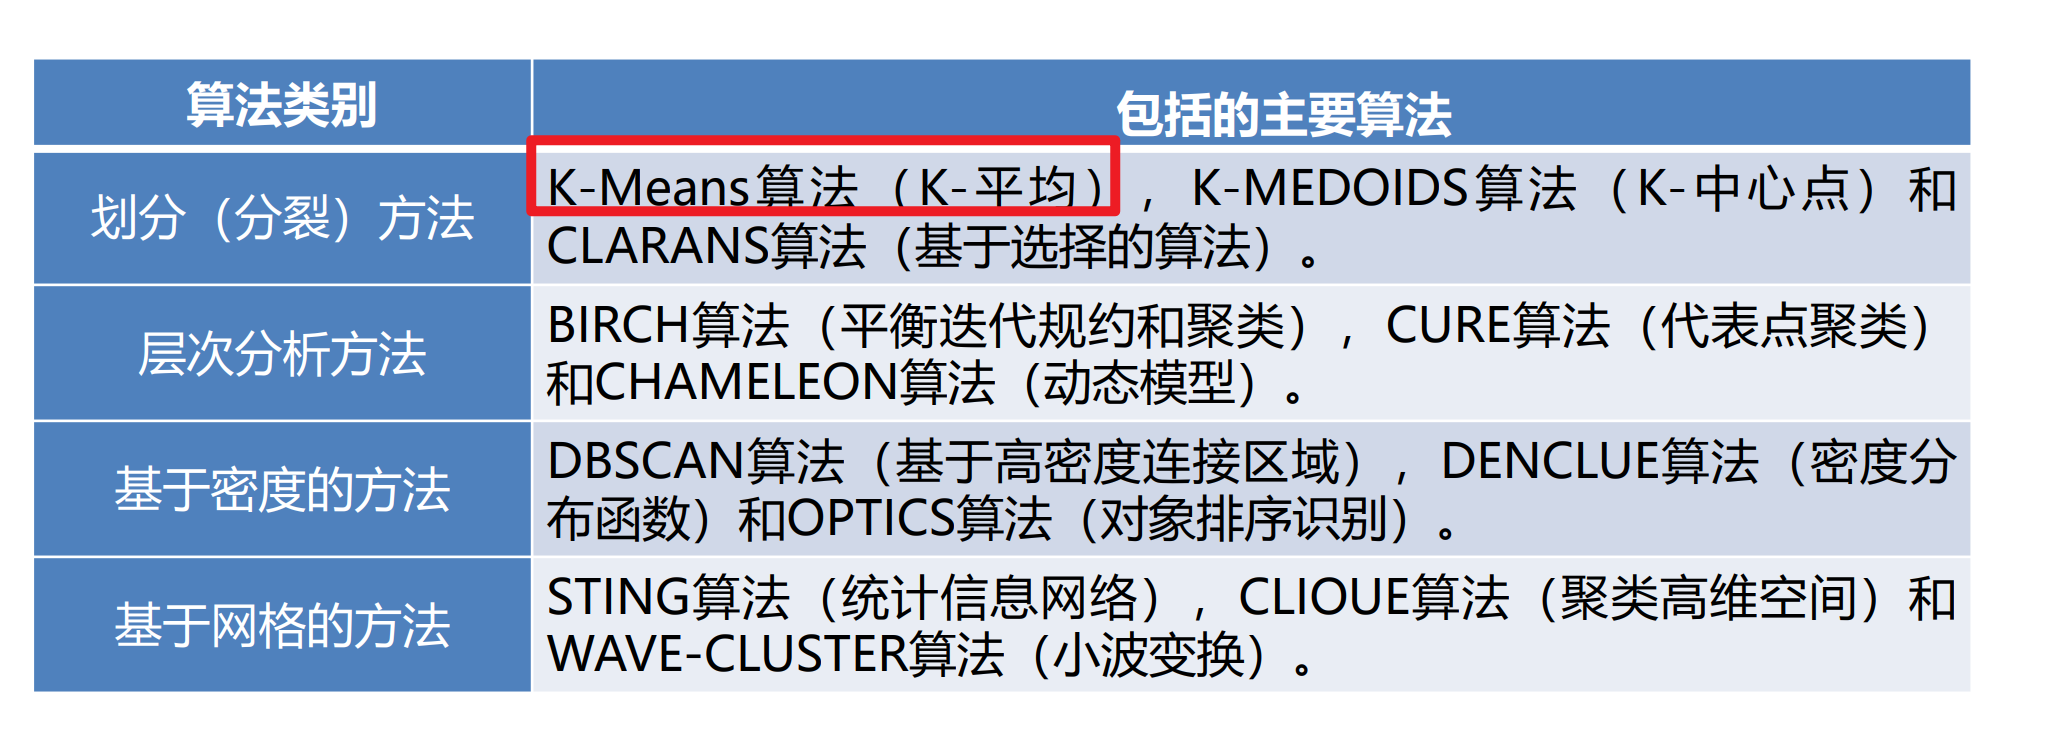

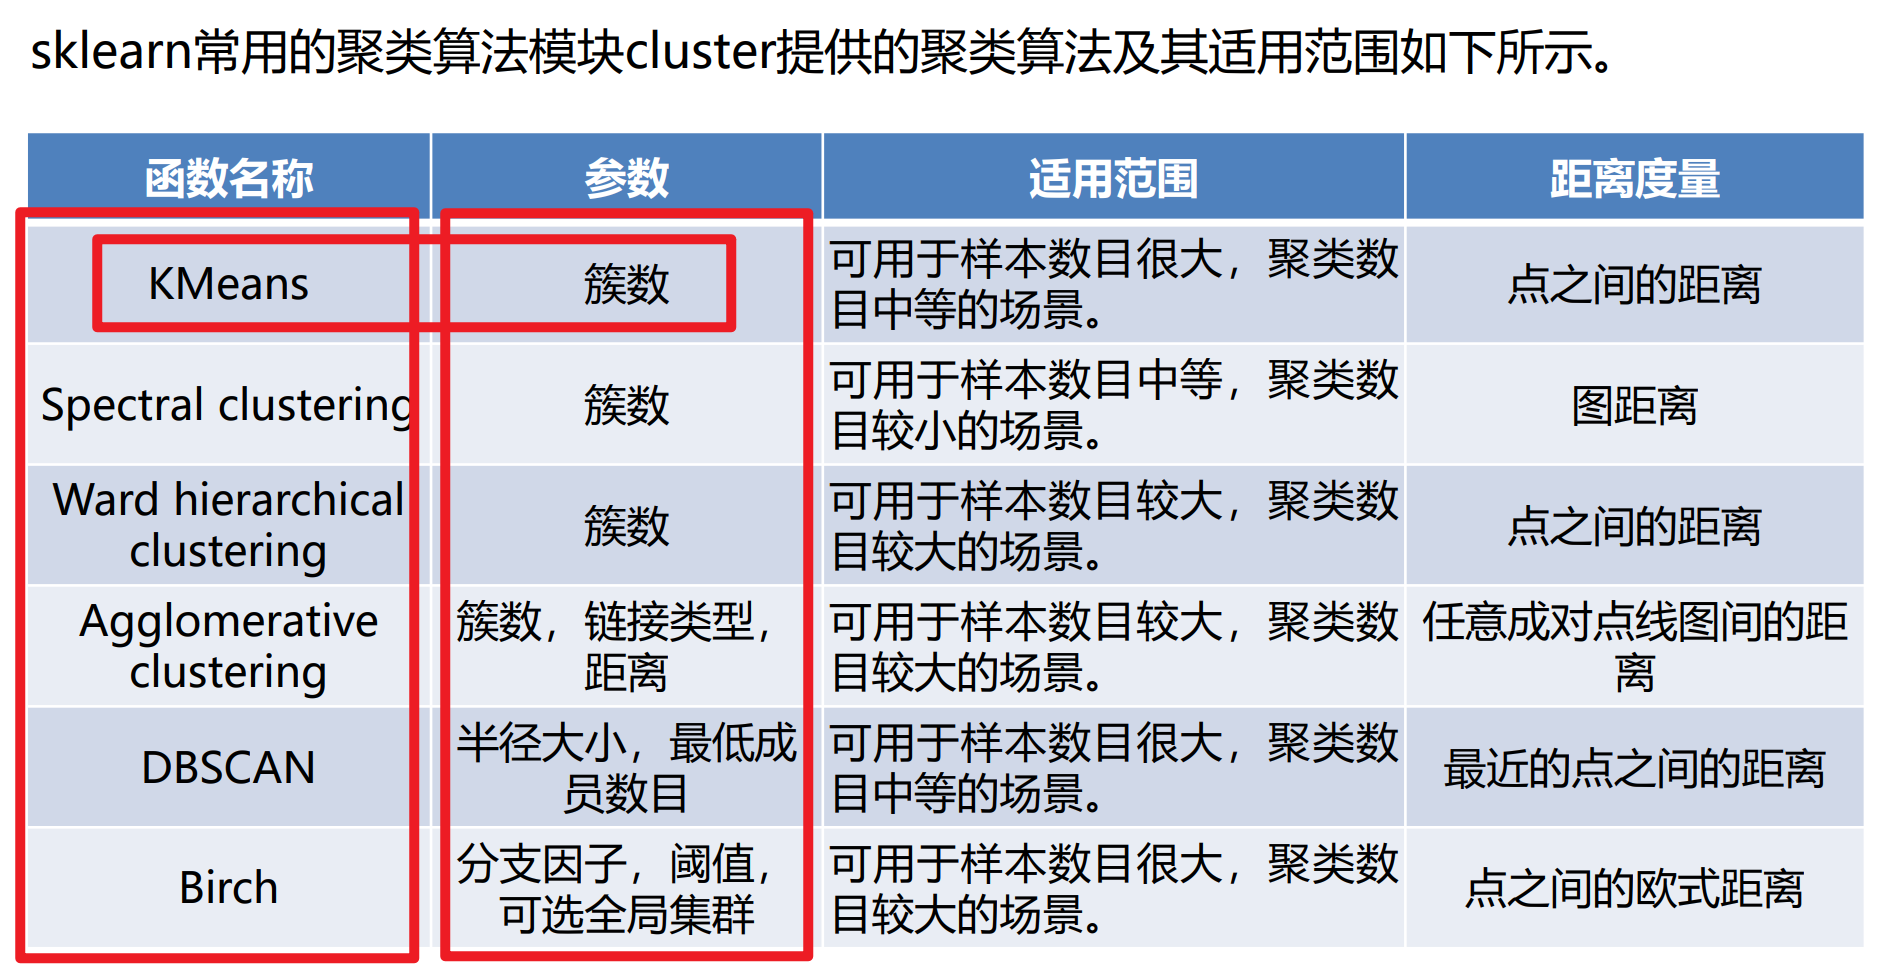

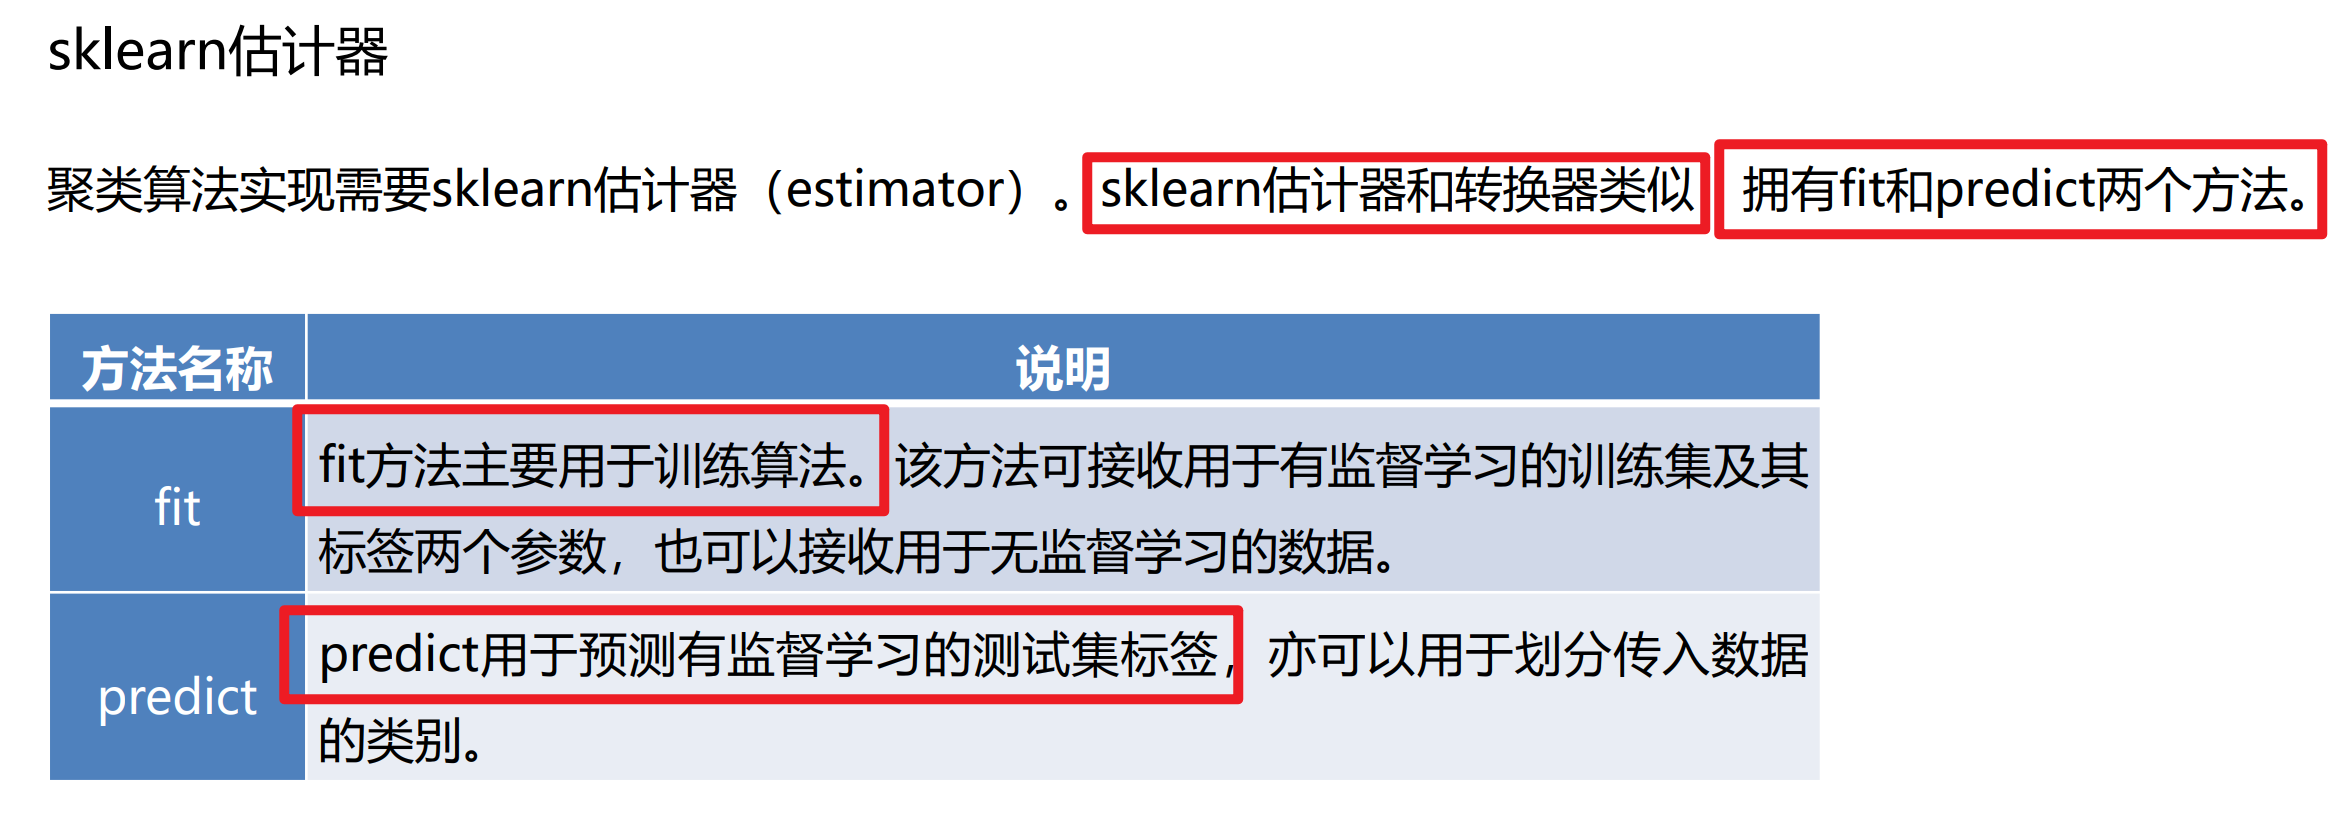

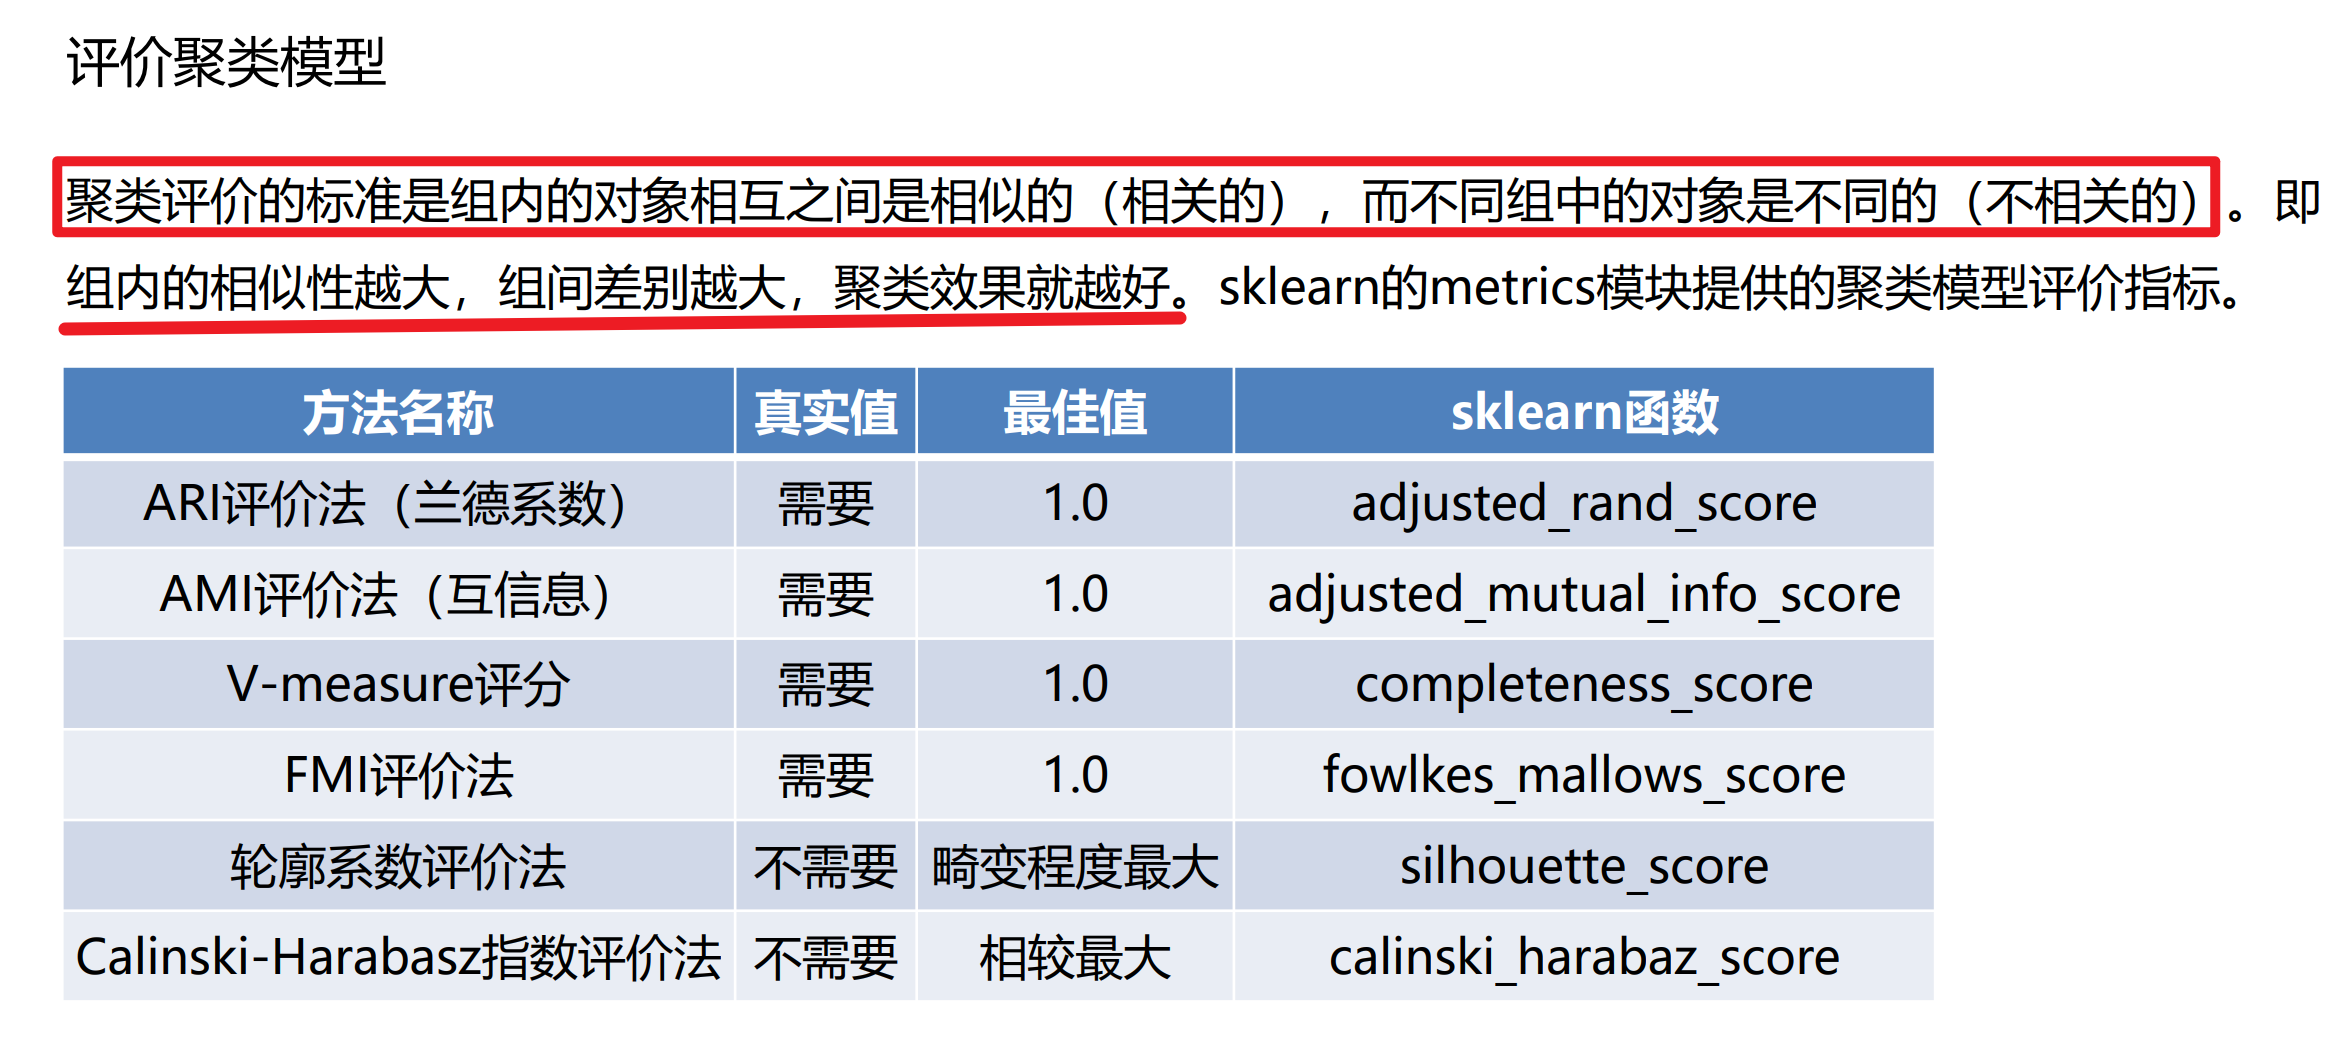

## 评价聚类模型

➢ 上表总共列出了6种评价的方法，其中前4种方法均需要真实值的配合才能够评价聚类算法的优劣，后2种
则不需要真实值的配合。但是前4种方法评价的效果更具有说服力，并且在实际运行的过程中在有真实值
做参考的情况下，聚类方法的评价可以等同于分类算法的评价。<br>
➢ 除了轮廓系数以外的评价方法，在不考虑业务场景的情况下都是得分越高，其效果越好，最高分值均为1
。而轮廓系数则需要判断不同类别数目的情况下其轮廓系数的走势，寻找最优的聚类数目。<br>
➢ 在具备真实值作为参考的情况下，几种方法均可以很好地评估聚类模型。在没有真实值作为参考的时候，
轮廓系数评价方法和Calinski-Harabasz指数评价方法可以结合使用。

### 聚类

In [36]:
from sklearn.cluster import KMeans

In [39]:
# 设置聚类方式  n_clusters=3 表示聚成3类
km=KMeans(n_clusters=3)
# 执行聚类操作  data['data']   表示需要聚类的数据
km.fit(data['data'])
# 查看聚类后的数据标签
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [40]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# 访问数据聚类中心
km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### 模型评估

In [44]:
from sklearn.metrics import adjusted_rand_score

# 评估模型（有数据标签）
# help(adjusted_rand_score)
# data['target']   表示实际标签
# km.labeks_   表示预测标签
adjusted_rand_score(data['target'],km.labels_)


0.7302382722834697

In [45]:
from sklearn.metrics import silhouette_score\

# 评估模型（无数据标签啊）
# silhouette_score?
# data['data']  表示聚类数据源
# km.labels_  表示聚类标签
silhouette_score(data['data'],km.labels_)

0.5528190123564095

# 构建并评价分类模型

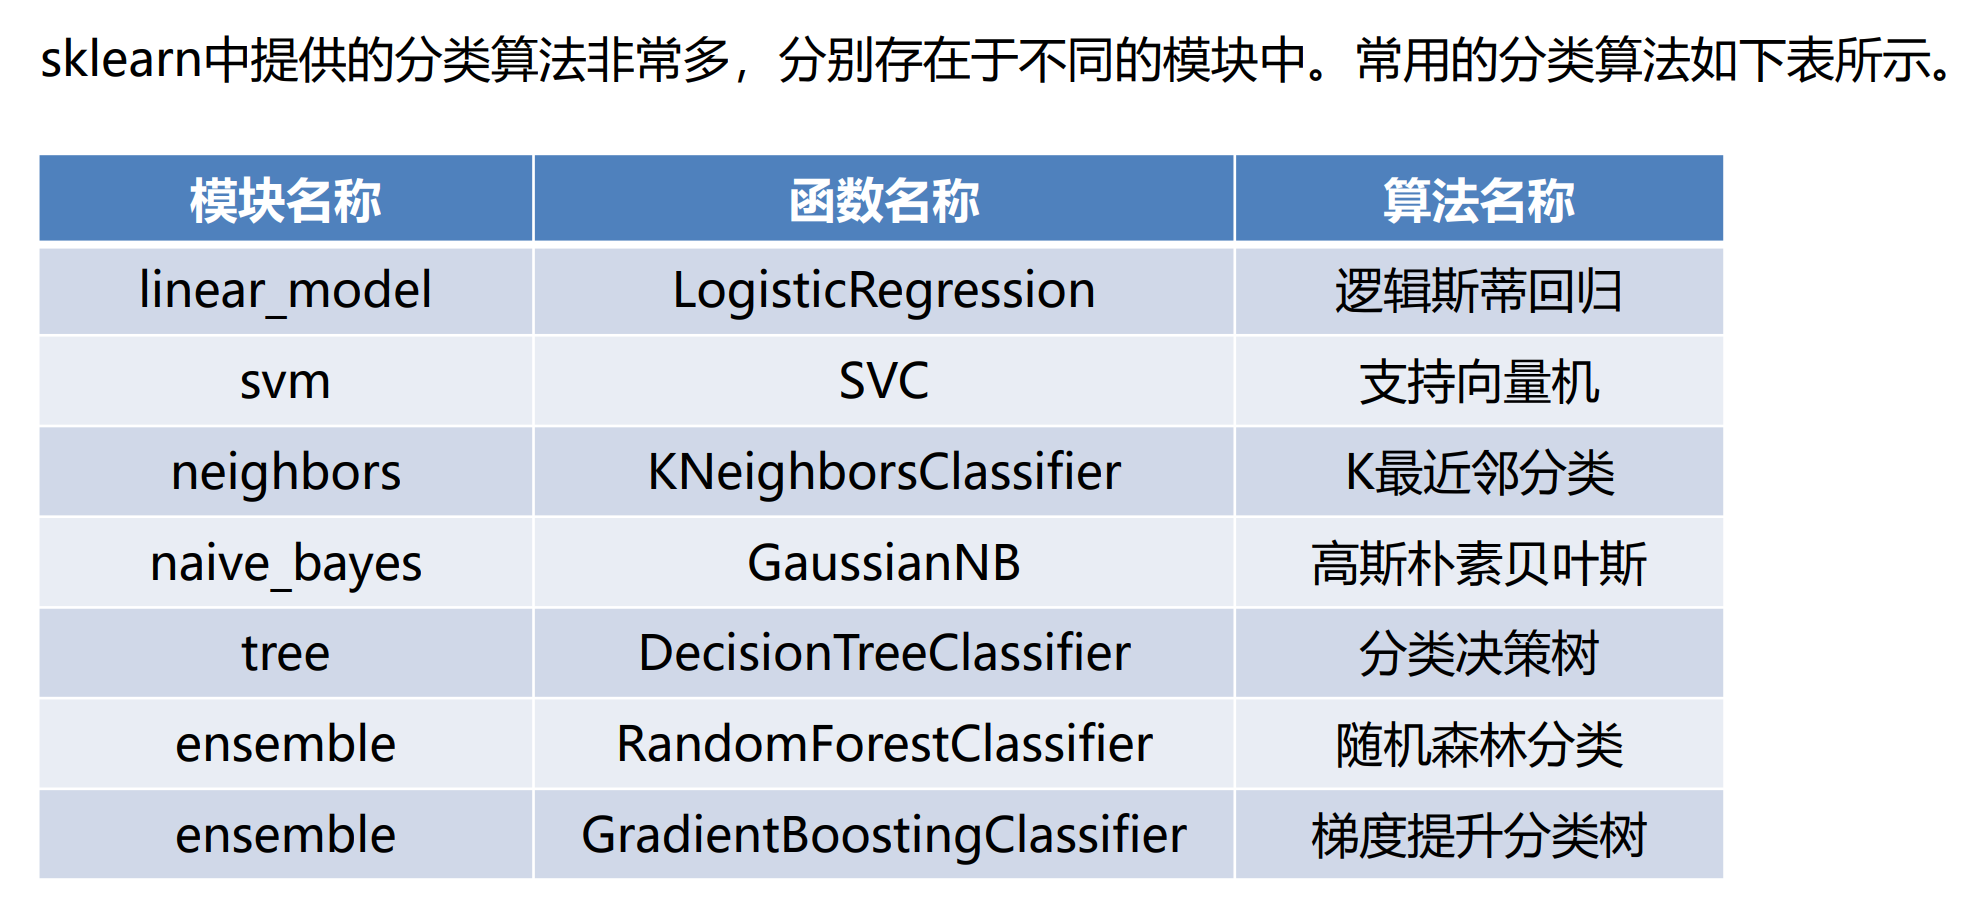

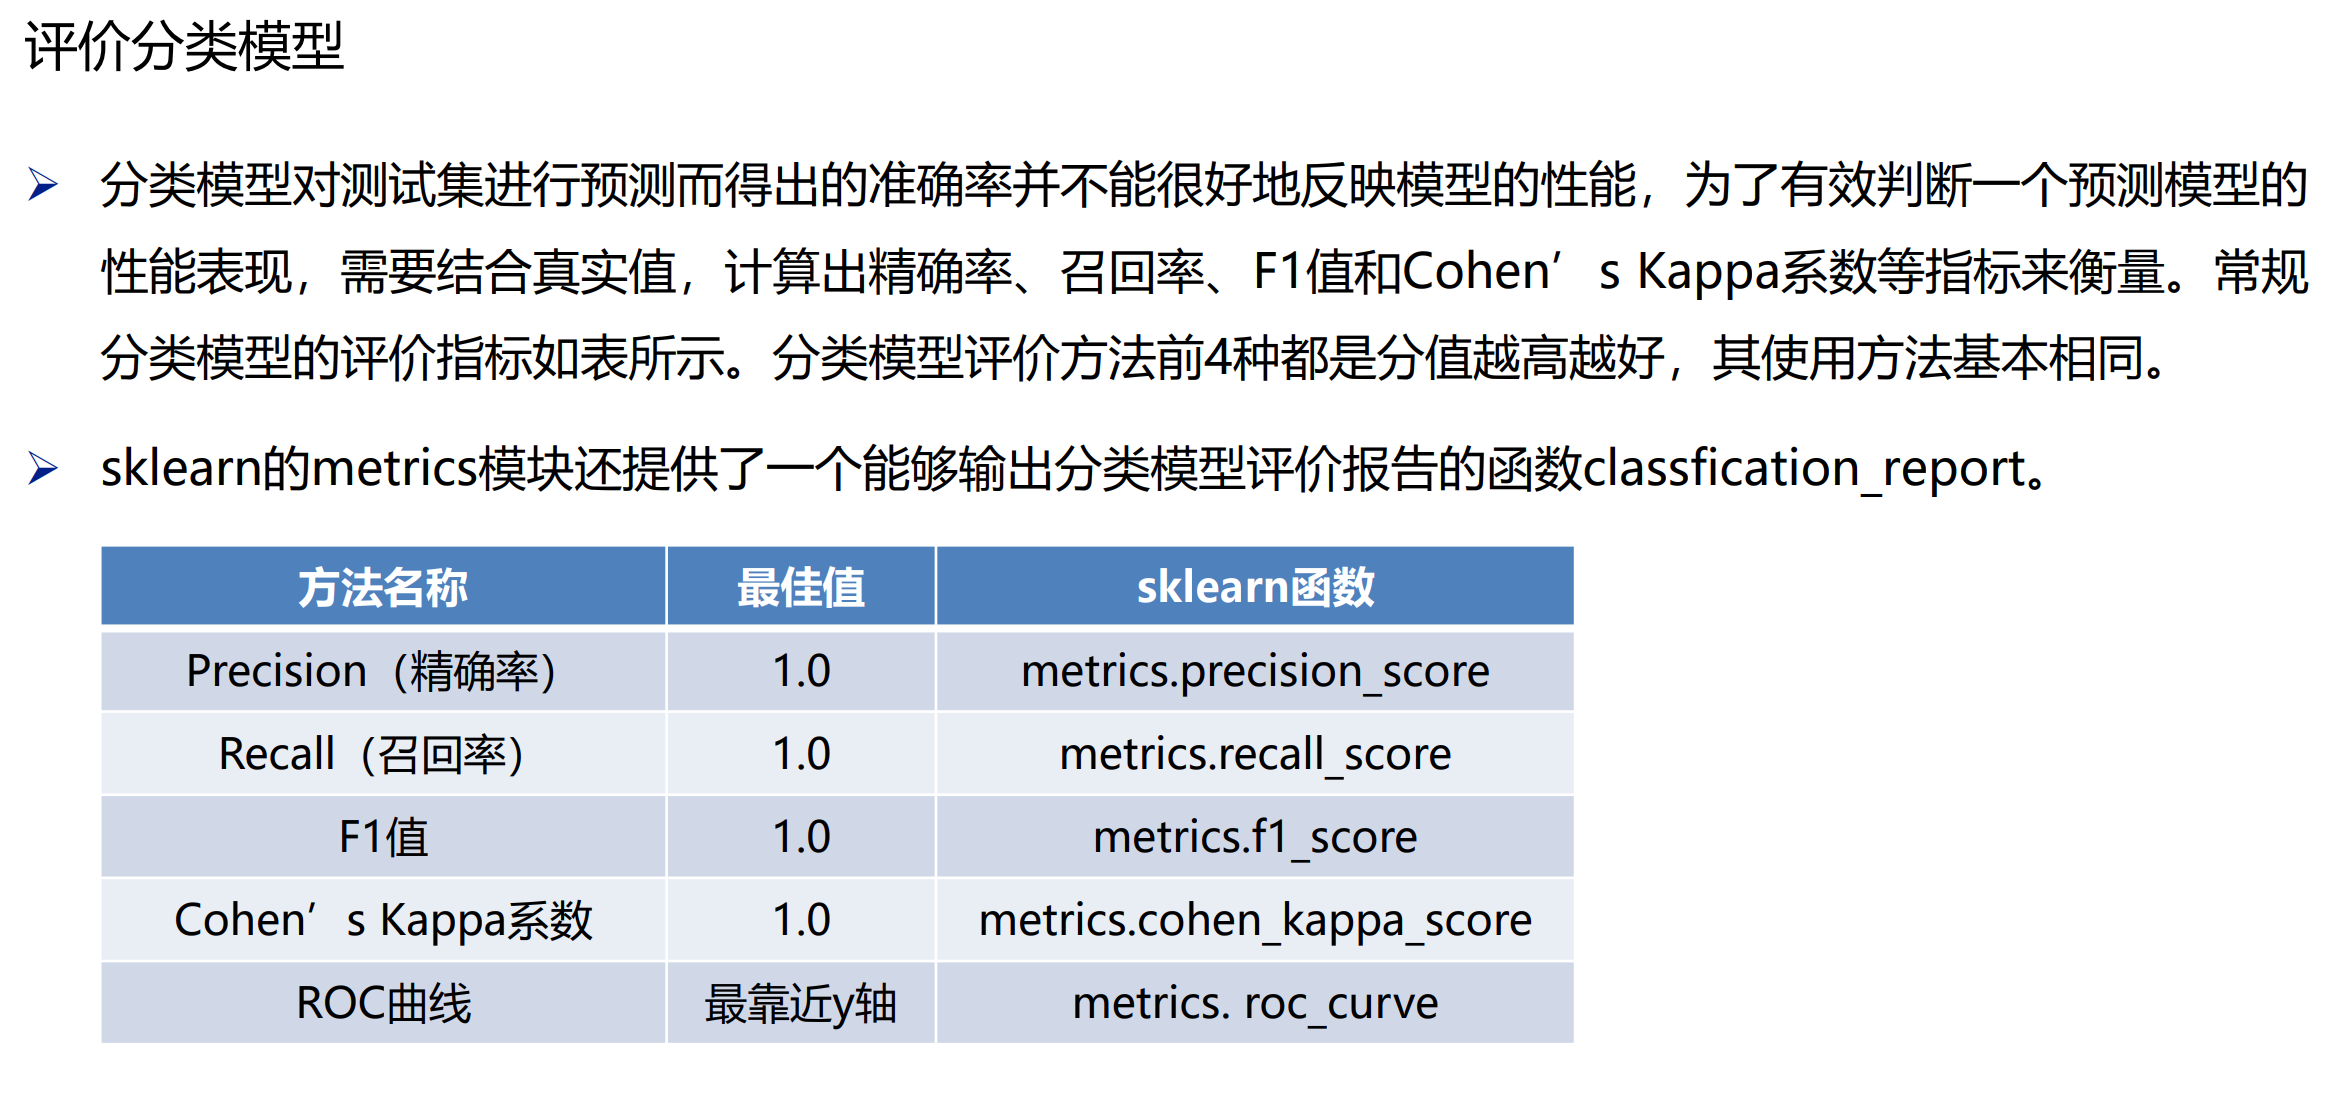

In [49]:
from sklearn.datasets import load_iris

# return_X_y=True  表示仅仅放回数据和标签
data = load_iris(return_X_y=True)
# 数据以元组的方式返回
# type(data)
data[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
from sklearn.model_selection import train_test_split

# 将数据分为训练集和测试集
# data[0] 表示数据, 
# data[1]  表示标签
x = data[0]
y = data[1]
x_train,x_test,y_train,y_test=train_test_split(
                            x,y,test_size=0.2,
                            stratify=y)
y_train

array([0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1,
       0, 0, 1, 1, 2, 1, 0, 0, 1, 1])

In [51]:
from sklearn.tree import DecisionTreeClassifier

# 实例化决策树
clf = DecisionTreeClassifier()
# 训练模型
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
# 打印分类标签
clf.classes_

array([0, 1, 2])

In [53]:
# 打印分类中心
clf.feature_importances_

array([0.        , 0.01666667, 0.96571429, 0.01761905])

In [54]:
# 对测试样本的标签进行预测
predict =  clf.predict(x_test)
predict

array([1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2,
       2, 0, 0, 1, 0, 0, 1, 1])

In [55]:
y_test

array([1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2,
       2, 0, 0, 1, 0, 0, 1, 1])

In [56]:
(predict==y_test).mean()

0.8666666666666667

In [57]:
from sklearn.metrics import classification_report

# 打印模型评估报告
report = classification_report(y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.90      0.82        10
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



## 构建并评价回归模型

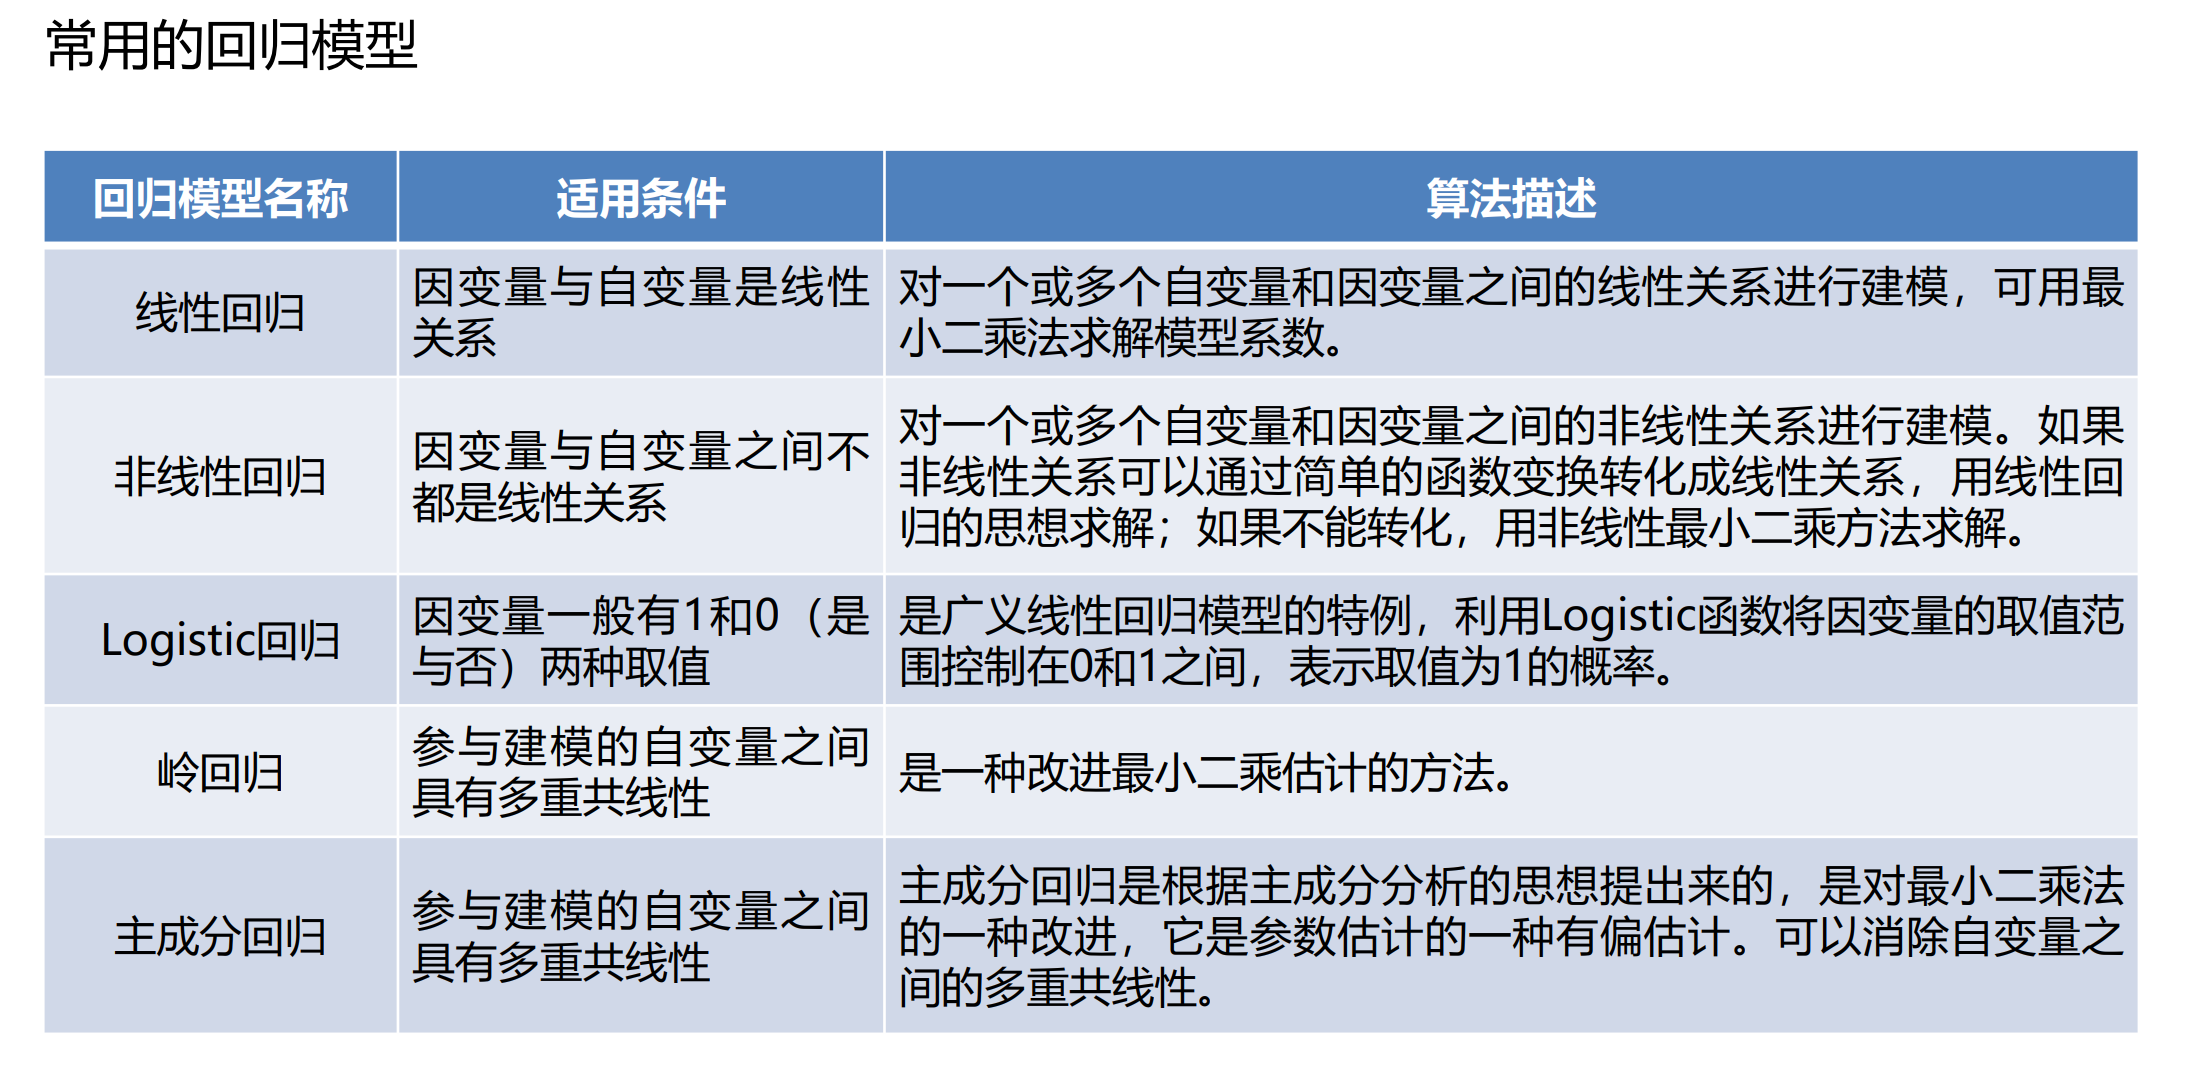

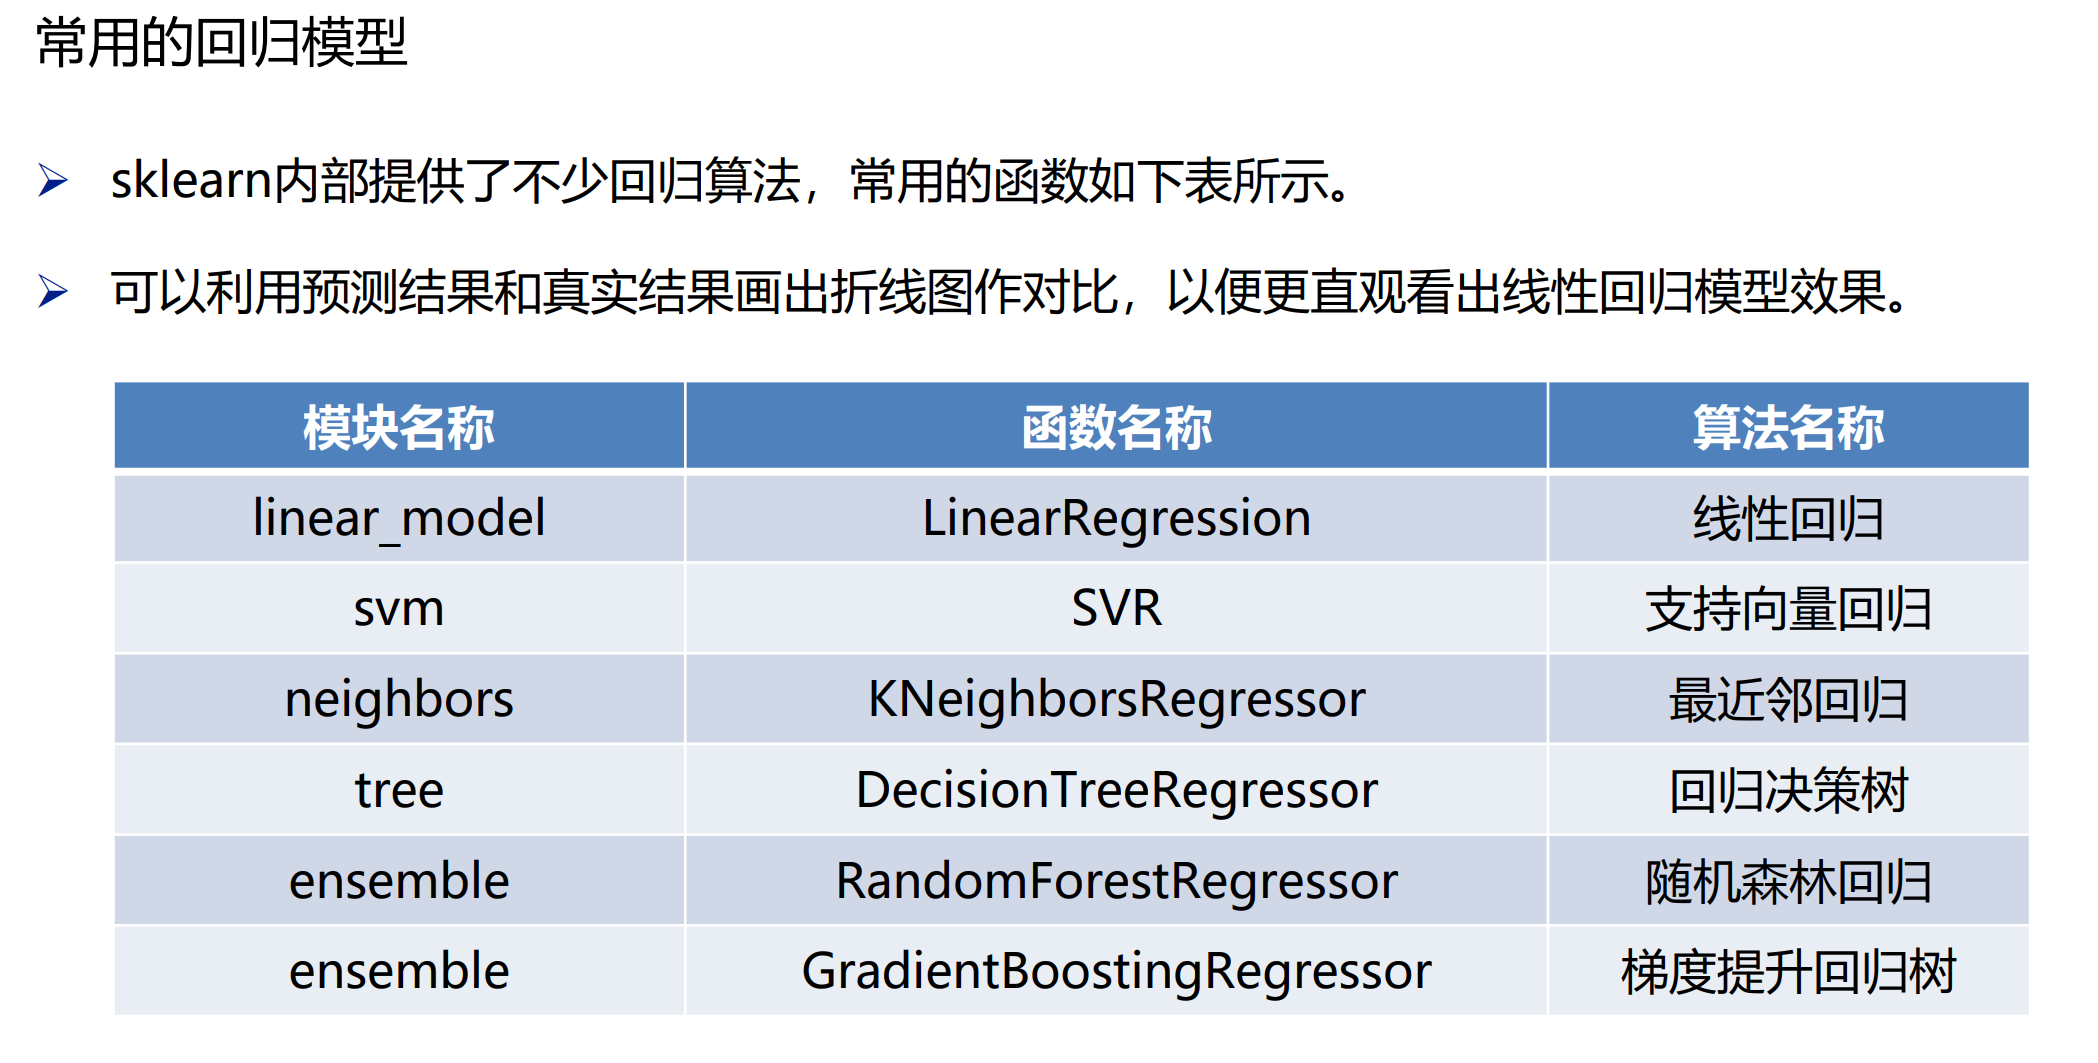

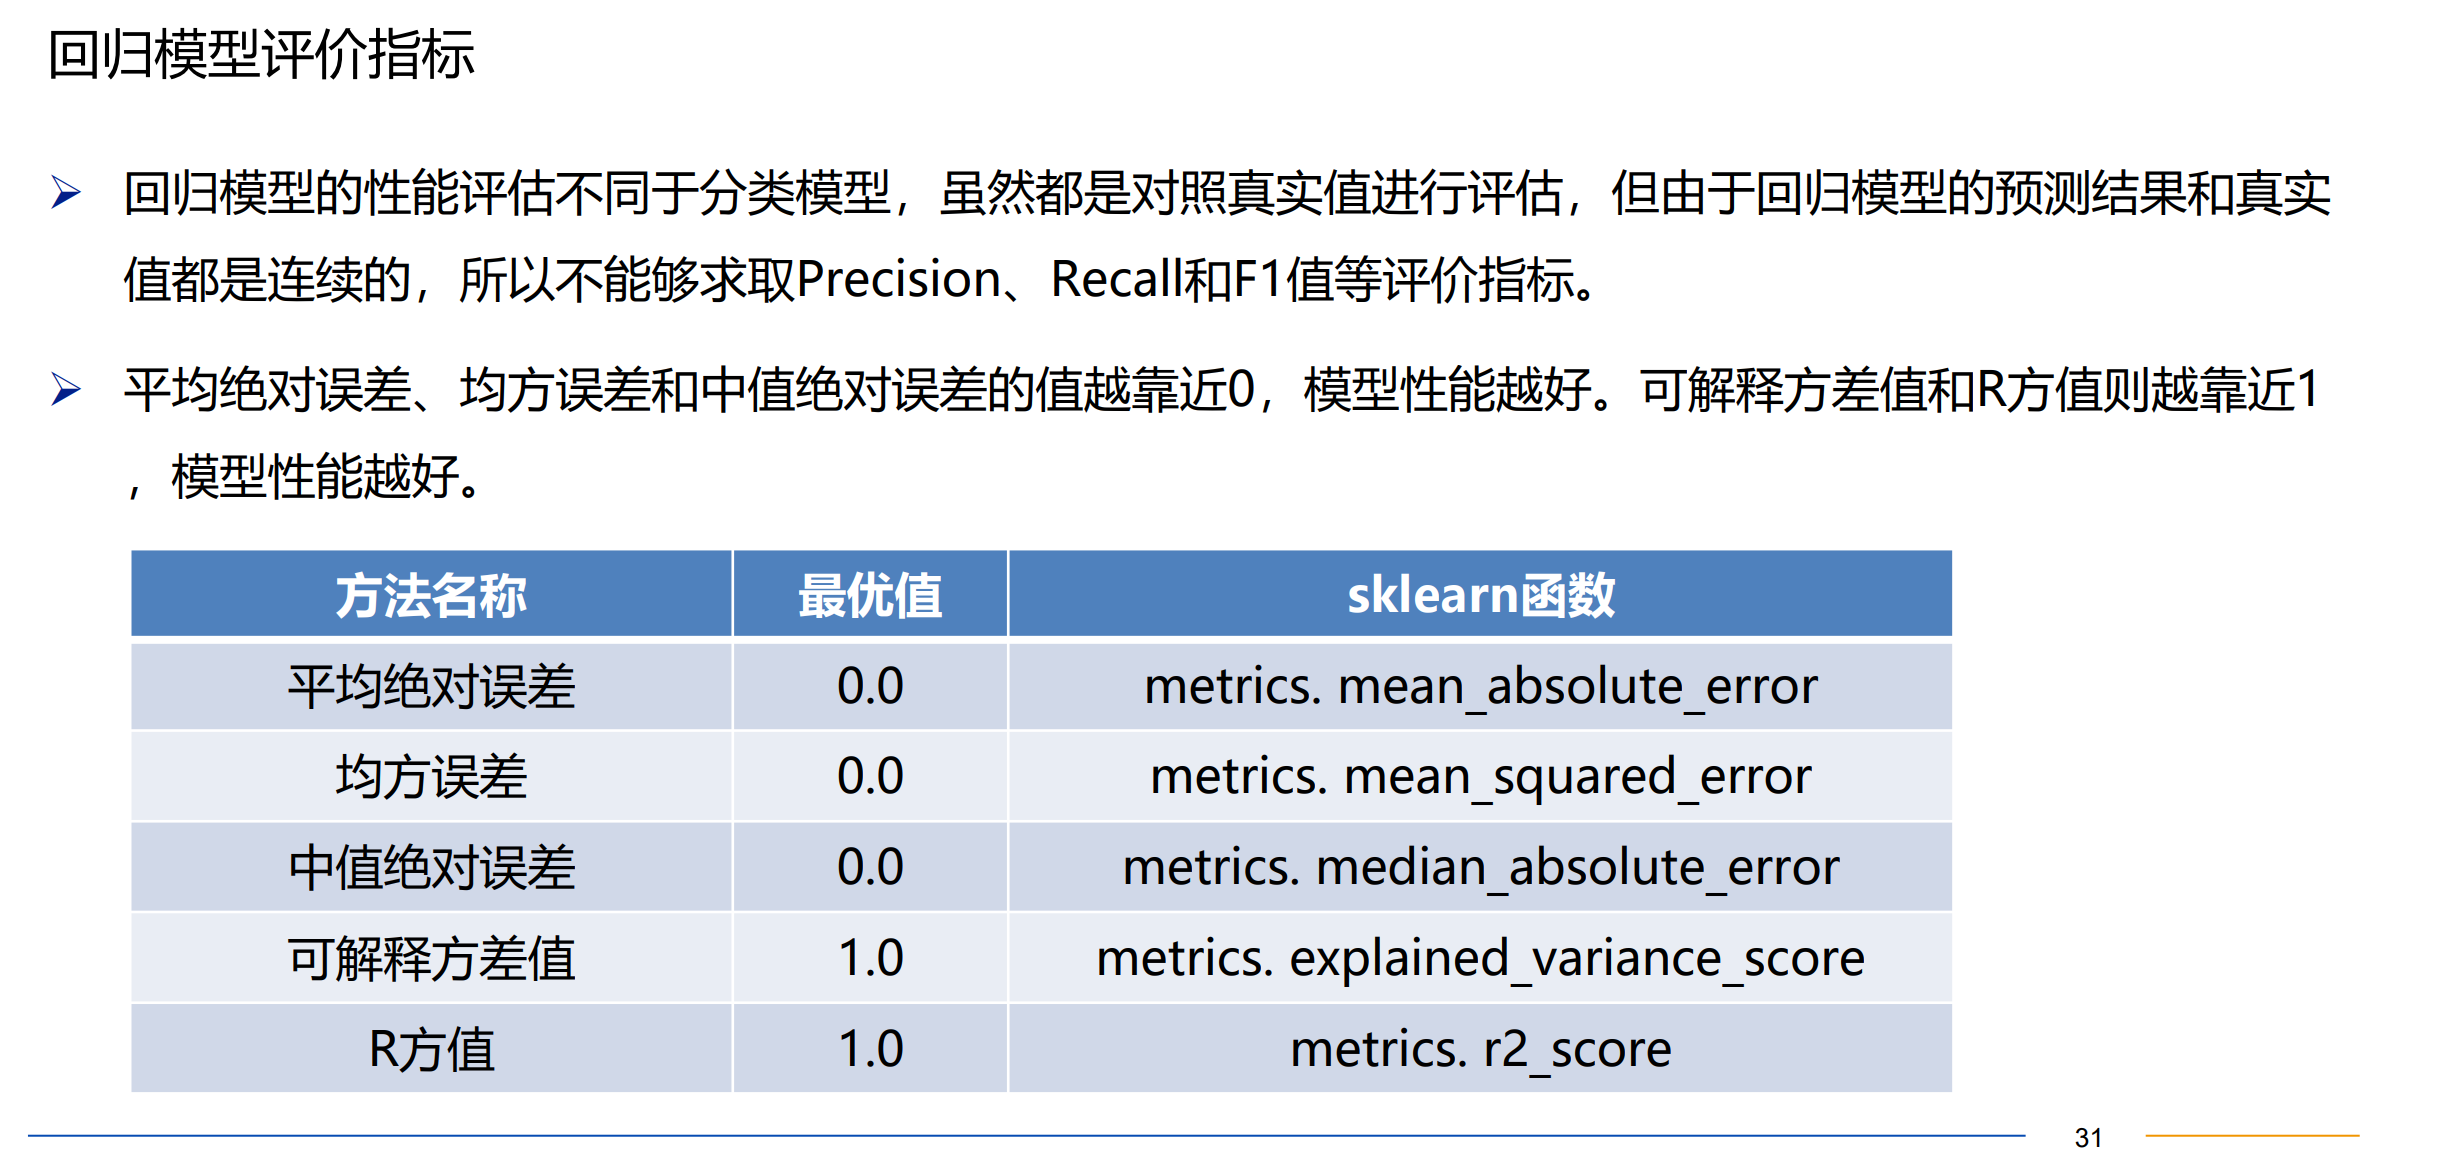

In [59]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [60]:
boston['data'].shape

(506, 13)

In [61]:
# 分割数据
x_train,x_test,y_train,y_test=train_test_split(
                            boston['data'],boston['target'],
                            test_size=0.2)

In [62]:
# 构建并训练模型
model = LinearRegression().fit(x_train,y_train)

In [63]:
# 访问模型属性
model.coef_

array([-1.18725169e-01,  4.87096337e-02,  8.41467516e-03,  2.47675784e+00,
       -2.05579889e+01,  3.17620416e+00,  4.16738730e-03, -1.51508528e+00,
        3.12918535e-01, -1.13958502e-02, -9.93966517e-01,  9.29124942e-03,
       -4.98433972e-01])

In [64]:
# 查看截距
model.intercept_

42.01199982392576

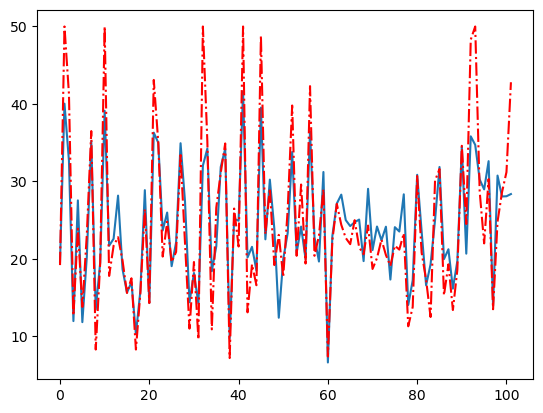

In [65]:
import matplotlib.pyplot as plt

predict = model.predict(x_test)
# 评估模型方式一
plt.figure()
plt.plot(range(len(y_test)),predict)
plt.plot(range(len(y_test)),y_test,'r-.')
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error

# 模型评估方式二
mean_squared_error(y_test,predict)

23.850199845955

<hr><br><center>Author:Jason Black<center>